## Download Required Packages

In [33]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


## Necessary Imports

In [41]:
import os
import splitfolders
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, AveragePooling2D
from tensorflow.keras import optimizers, callbacks
from keras.regularizers import l2
import numpy as np
from keras.preprocessing import image

In [2]:
path, dirs, files = next(os.walk(r"C:\Users\hp\Desktop\Work\Freelance\CNN\dataset"))
dirs

['Cat', 'Dog', 'Elephant', 'Horse', 'Lion']

## Splitting data into train, test and Validation split

In [3]:
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("dataset", output="data",
    seed=1337, ratio=(.7, .2, .1), group_prefix=None, move=False) # default values

Copying files: 13494 files [00:47, 282.43 files/s]


## Data Distribution

In [3]:
train_count=[]
val_count=[]
test_count=[]

print('TRAINING SET COUNT\n')
files= os.listdir(r"C:\Users\hp\Desktop\Work\Freelance\CNN\data\train")
for each_class in files:
    count = os.listdir(r"C:\\Users\\hp\\Desktop\\Work\\Freelance\\CNN\\data\\train\\"+each_class+"\\")
    print(each_class+" has "+ str(len(count))+" images")
    train_count.append(len(count))
print()

print('VALIDATION SET COUNT\n')
files= os.listdir(r"C:\Users\hp\Desktop\Work\Freelance\CNN\data\val")
for each_class in files:
    count = os.listdir(r"C:\\Users\\hp\\Desktop\\Work\\Freelance\\CNN\\data\\val\\"+each_class+"\\")
    print(each_class+ " has "+ str(len(count))+" images")
    val_count.append(len(count))
print()

print('TEST SET COUNT\n')
files= os.listdir(r"C:\Users\hp\Desktop\Work\Freelance\CNN\data\test")
for each_class in files:
    count = os.listdir(r"C:\\Users\\hp\\Desktop\\Work\\Freelance\\CNN\\data\\test\\"+each_class+"\\")
    print(each_class+ " has  "+ str(len(count))+" images")
    test_count.append(len(count))
print()

TRAINING SET COUNT

Cat has 1915 images
Dog has 1838 images
Elephant has 1917 images
Horse has 1896 images
Lion has 1877 images

VALIDATION SET COUNT

Cat has 547 images
Dog has 525 images
Elephant has 547 images
Horse has 541 images
Lion has 536 images

TEST SET COUNT

Cat has  275 images
Dog has  264 images
Elephant has  275 images
Horse has  272 images
Lion has  269 images



In [5]:
train_count

[1915, 1838, 1917, 1896, 1877]

In [6]:
files

['Cat', 'Dog', 'Elephant', 'Horse', 'Lion']

In [ ]:
print('UNBALANCED TRAINING SET COUNT\n')
files= os.listdir(r"C:\Users\hp\Desktop\Work\Freelance\CNN\data\train")
for each_class in files:
    count = os.listdir(r"C:\\Users\\hp\\Desktop\\Work\\Freelance\\CNN\\data\\train\\"+each_class+"\\")
    print(each_class+" has "+ str(len(count))+" images")
    train_count.append(len(count))
print()

## Data Visualisation

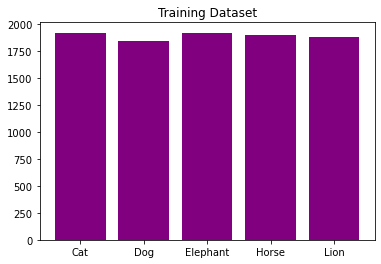

In [7]:
plt.bar(files, train_count, color='purple')
plt.title('Training Dataset')
plt.show()

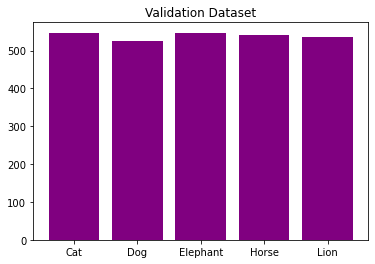

In [8]:
plt.bar(files, val_count, color='purple')
plt.title('Validation Dataset')
plt.show()

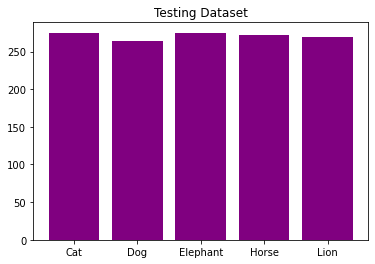

In [9]:
plt.bar(files, test_count, color='purple')
plt.title('Testing Dataset')
plt.show()

## Data Preprocessing

In [4]:
train_image_generator = ImageDataGenerator(rescale=1./255)
val_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

In [5]:
train_dir=r"C:\Users\hp\Desktop\Work\Freelance\CNN\data\train"
train_data_gen = train_image_generator.flow_from_directory(
                                            batch_size=20,
                                            directory=train_dir,
                                            shuffle=True, 
                                            target_size=(128, 128),
                                            class_mode='categorical',
                                            subset='training')

Found 9443 images belonging to 5 classes.


In [6]:
val_dir=r"C:\Users\hp\Desktop\Work\Freelance\CNN\data\val"
val_data_gen = val_image_generator.flow_from_directory(
                                            batch_size=20,
                                            directory=val_dir,
                                            shuffle=True, 
                                            target_size=(128, 128),
                                            class_mode='categorical')

Found 2696 images belonging to 5 classes.


In [7]:
train_data_gen.classes

array([0, 0, 0, ..., 4, 4, 4])

In [14]:
# confirming- the scaling works
batchX, batchy = train_data_gen.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(),
                                              batchX.max()))

Batch shape=(20, 128, 128, 3), min=0.000, max=1.000


## Balanced Dataset Model 1

In [8]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128,3)))
model.add(Conv2D(32, (3, 3), activation='relu', ))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', ))
model.add(Conv2D(64, (3, 3), activation='relu', ))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu',))
model.add(Dropout(.50))
model.add(Dense(5, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [10]:
opt = optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [11]:
history = model.fit(
                    train_data_gen,
                    steps_per_epoch=32,
                    epochs=50,
                    validation_data=val_data_gen,
                    validation_steps=50
                    )

Epoch 1/50
32/32 [==============================] - 40s 1s/step - loss: 7.7169 - accuracy: 0.3676 - val_loss: 2.1229 - val_accuracy: 0.2340
Epoch 2/50
32/32 [==============================] - 36s 1s/step - loss: 5.5009 - accuracy: 0.4375 - val_loss: 2.3630 - val_accuracy: 0.2030
Epoch 3/50
32/32 [==============================] - 36s 1s/step - loss: 2.5529 - accuracy: 0.5328 - val_loss: 2.0888 - val_accuracy: 0.2480
Epoch 4/50
32/32 [==============================] - 36s 1s/step - loss: 1.8788 - accuracy: 0.4437 - val_loss: 1.6861 - val_accuracy: 0.1840
Epoch 5/50
32/32 [==============================] - 36s 1s/step - loss: 1.2915 - accuracy: 0.4797 - val_loss: 1.8750 - val_accuracy: 0.2510
Epoch 6/50
32/32 [==============================] - 36s 1s/step - loss: 1.0841 - accuracy: 0.5875 - val_loss: 1.9779 - val_accuracy: 0.2000
Epoch 7/50
32/32 [==============================] - 36s 1s/step - loss: 1.0723 - accuracy: 0.5953 - val_loss: 1.9662 - val_accuracy: 0.2390
Epoch 8/50
32/32 [==

In [13]:
model.save(r"C:\Users\hp\Desktop\Work\Freelance\CNN\model1.h5")

## Balanced Dataset Model 2

In [17]:
model2 = models.Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128,3)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(32, (3, 3), activation='relu', ))
model2.add(MaxPooling2D((2, 2)))
model2.add(BatchNormalization())

model2.add(Conv2D(64, (3, 3), activation='relu', ))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu', ))
model2.add(MaxPooling2D((2, 2)))
model2.add(BatchNormalization())

model2.add(Flatten())
model2.add(Dropout(.50))
model2.add(Dense(32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model2.add(Dense(128, activation='relu',))
model2.add(Dense(5, activation='softmax'))

In [18]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                      

In [19]:
opt = optimizers.SGD()
model2.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [20]:
history2 = model2.fit(
                    train_data_gen,
                    steps_per_epoch=64,
                    epochs=50,
                    validation_data=val_data_gen,
                    validation_steps=50
                    )

Epoch 1/50
64/64 [==============================] - 24s 360ms/step - loss: 2.2422 - accuracy: 0.3333 - val_loss: 2.2185 - val_accuracy: 0.2120
Epoch 2/50
64/64 [==============================] - 23s 357ms/step - loss: 1.8782 - accuracy: 0.4906 - val_loss: 2.2598 - val_accuracy: 0.2360
Epoch 3/50
64/64 [==============================] - 22s 349ms/step - loss: 1.7605 - accuracy: 0.5321 - val_loss: 2.3449 - val_accuracy: 0.2250
Epoch 4/50
64/64 [==============================] - 23s 363ms/step - loss: 1.5401 - accuracy: 0.6273 - val_loss: 2.2757 - val_accuracy: 0.2590
Epoch 5/50
64/64 [==============================] - 23s 353ms/step - loss: 1.4587 - accuracy: 0.6453 - val_loss: 2.0462 - val_accuracy: 0.4180
Epoch 6/50
64/64 [==============================] - 23s 364ms/step - loss: 1.3860 - accuracy: 0.6852 - val_loss: 1.7960 - val_accuracy: 0.4460
Epoch 7/50
64/64 [==============================] - 27s 426ms/step - loss: 1.3101 - accuracy: 0.7023 - val_loss: 2.3966 - val_accuracy: 0.3620

In [21]:
model2.save(r"C:\Users\hp\Desktop\Work\Freelance\CNN\model2.h5")

## Balanced Dataset Model 3

In [33]:
model3 = models.Sequential()
model3.add(Conv2D(128, (5, 5), input_shape=(128, 128, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())

model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())

model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())

model3.add(Flatten())
model3.add(Dropout(0.5))
model3.add(Dense(512,activation='relu'))
model3.add(Dense(5, activation='softmax'))
model3.summary()

NameError: name 'Sequential' is not defined

In [34]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_7 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 conv2d_19 (Conv2D)          (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 29, 29, 64)      

In [35]:
opt = optimizers.RMSprop(lr=1e-4)
model3.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [36]:
history3 = model3.fit(
                    train_data_gen,
                    steps_per_epoch=128,
                    epochs=50,
                    validation_data=val_data_gen,
                    validation_steps=70
                    )

Epoch 1/50
128/128 [==============================] - 73s 563ms/step - loss: 1.0097 - accuracy: 0.6374 - val_loss: 1.9045 - val_accuracy: 0.2550
Epoch 2/50
128/128 [==============================] - 72s 559ms/step - loss: 0.8757 - accuracy: 0.6929 - val_loss: 1.7642 - val_accuracy: 0.3780
Epoch 3/50
128/128 [==============================] - 72s 561ms/step - loss: 0.7516 - accuracy: 0.7379 - val_loss: 0.7865 - val_accuracy: 0.7030
Epoch 4/50
128/128 [==============================] - 71s 558ms/step - loss: 0.6927 - accuracy: 0.7461 - val_loss: 0.7060 - val_accuracy: 0.7270
Epoch 5/50
128/128 [==============================] - 73s 569ms/step - loss: 0.6275 - accuracy: 0.7656 - val_loss: 0.6087 - val_accuracy: 0.7650
Epoch 6/50
128/128 [==============================] - 73s 572ms/step - loss: 0.5685 - accuracy: 0.7906 - val_loss: 0.7113 - val_accuracy: 0.7490
Epoch 7/50
128/128 [==============================] - 76s 594ms/step - loss: 0.5397 - accuracy: 0.8066 - val_loss: 0.6431 - val_ac

In [37]:
model3.save(r"C:\Users\hp\Desktop\Work\Freelance\CNN\model3.h5")

## Balanced DataSet Models Performance

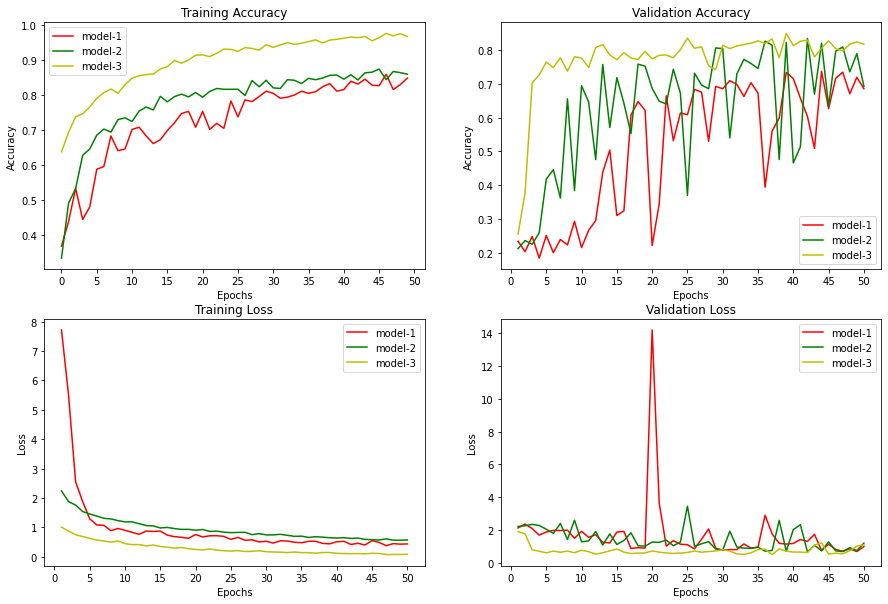

In [39]:
# summarize history for accuracy
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.plot(np.arange(0, len(history.history['accuracy'])), history.history['accuracy'], 'r')
plt.plot(np.arange(0, len(history2.history['accuracy'])), history2.history['accuracy'], 'g')
plt.plot(np.arange(0, len(history3.history['accuracy'])), history3.history['accuracy'], 'y')
plt.xticks(np.arange(0, 50+1, 50/10))
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['model-1','model-2','model-3'], loc='best')
  
plt.subplot(2, 2, 2)
plt.plot(np.arange(1, len(history.history['val_accuracy'])+1), history.history['val_accuracy'], 'r')
plt.plot(np.arange(1, len(history2.history['val_accuracy'])+1), history2.history['val_accuracy'], 'g')
plt.plot(np.arange(1, len(history3.history['val_accuracy'])+1), history3.history['val_accuracy'], 'y')
plt.xticks(np.arange(0, 50+1, 50/10))
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['model-1','model-2','model-3'], loc='best')

plt.subplot(2, 2, 3)
plt.plot(np.arange(1, len(history.history['loss'])+1), history.history['loss'], 'r')
plt.plot(np.arange(1, len(history2.history['loss'])+1), history2.history['loss'], 'g')
plt.plot(np.arange(1, len(history3.history['loss'])+1), history3.history['loss'], 'y')
plt.xticks(np.arange(0, 50+1, 50/10))
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['model-1','model-2','model-3'], loc='best')

plt.subplot(2, 2, 4)
plt.plot(np.arange(1, len(history.history['val_loss'])+1), history.history['val_loss'], 'r')
plt.plot(np.arange(1, len(history2.history['val_loss'])+1), history2.history['val_loss'], 'g')
plt.plot(np.arange(1, len(history3.history['val_loss'])+1), history3.history['val_loss'], 'y')
plt.xticks(np.arange(0, 50+1, 50/10))
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['model-1','model-2','model-3'], loc='best')
  
plt.show()

## Unbalanced DataSet Models Performance

# summarize history for accuracy
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.plot(np.arange(0, len(history_ub.history['accuracy'])), history_ub.history['accuracy'], 'r')
plt.plot(np.arange(0, len(history2.history['accuracy'])), history2_ub.history['accuracy'], 'g')
# plt.plot(np.arange(0, len(history3_ub.history['accuracy'])), history3_ub.history['accuracy'], 'y')
plt.xticks(np.arange(0, 50+1, 50/10))
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['model-1','model-2','model-3'], loc='best')
  
plt.subplot(2, 2, 2)
plt.plot(np.arange(1, len(history_ub.history['val_accuracy'])+1), history_ub.history['val_accuracy'], 'r')
plt.plot(np.arange(1, len(history2_ub.history['val_accuracy'])+1), history2_ub.history['val_accuracy'], 'g')
# plt.plot(np.arange(1, len(history3_ub.history['val_accuracy'])+1), history3_ub.history['val_accuracy'], 'g')
plt.xticks(np.arange(0, 50+1, 50/10))
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['model-1','model-2','model-3'], loc='best')

plt.subplot(2, 2, 3)
plt.plot(np.arange(1, len(history_ub.history['loss'])+1), history_ub.history['loss'], 'r')
plt.plot(np.arange(1, len(history2_ub.history['loss'])+1), history2_ub.history['loss'], 'g')
# plt.plot(np.arange(1, len(history3_ub.history['loss'])+1), history3_ub.history['loss'], 'y')
plt.xticks(np.arange(0, 50+1, 50/10))
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['model-1','model-2','model-3'], loc='best')

plt.subplot(2, 2, 4)
plt.plot(np.arange(1, len(history_ub.history['val_loss'])+1), history_ub.history['val_loss'], 'r')
plt.plot(np.arange(1, len(history2_ub.history['val_loss'])+1), history2_ub.history['val_loss'], 'g')
# plt.plot(np.arange(1, len(history3_ub.history['val_loss'])+1), history3_ub.history['val_loss'], 'y')
plt.xticks(np.arange(0, 50+1, 50/10))
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['model-1','model-2','model-3'], loc='best')
  
plt.show()

## Channels in Intermediate Activation

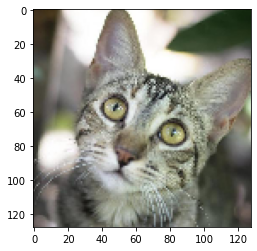

(1, 128, 128, 3)


In [43]:
img_path = r'C:\Users\hp\Desktop\Work\Freelance\CNN\test\cat_01.jpg'
img = image.load_img(img_path, target_size=(128, 128))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [44]:
layer_outputs = [layer.output for layer in model.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [45]:
activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation

In [46]:
activations

[array([[[[0.05567411, 0.06120296, 0.        , ..., 0.        ,
           0.04689676, 0.06059486],
          [0.05477832, 0.06032953, 0.        , ..., 0.        ,
           0.04792787, 0.05957662],
          [0.05321555, 0.06106405, 0.        , ..., 0.        ,
           0.04551293, 0.05595049],
          ...,
          [0.0203707 , 0.06330517, 0.        , ..., 0.        ,
           0.01222396, 0.04016297],
          [0.02339637, 0.06211331, 0.        , ..., 0.        ,
           0.01064615, 0.04152208],
          [0.02387604, 0.06411256, 0.        , ..., 0.        ,
           0.01025973, 0.04395695]],
 
         [[0.05802979, 0.05976264, 0.        , ..., 0.        ,
           0.04808424, 0.05906685],
          [0.05798816, 0.05932719, 0.        , ..., 0.        ,
           0.04890063, 0.05964832],
          [0.05456711, 0.06013817, 0.        , ..., 0.        ,
           0.04710333, 0.05746918],
          ...,
          [0.01958799, 0.06236824, 0.        , ..., 0.        ,
   

In [49]:
first_layer_activation = activations[4]
print(first_layer_activation.shape)

(1, 60, 60, 64)


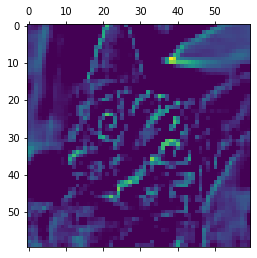

In [50]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')